Tasks:

1. Load the Data: Import the Titanic dataset (available on here and convert it into a pandas DataFrame.

2. Explore the Data: Use pandas to explore the dataset:
Use the df.head(), df.describe(), and df.info() functions to understand the structure of the dataset.

3. Visualize the Data: Use matplotlib to visualize different aspects of the data. Here are some specific tasks:
Create a pie chart to show the ratio of male to female passengers.
Create a histogram to show the distribution of passenger ages.
Create a bar plot to show the number of passengers who survived and didn’t survive.
Create a stacked bar plot to show the number of passengers who survived and didn’t survive, split by gender.
Create a scatter plot to show the correlation between fare and age.

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

head
   Survived  Pclass                                               Name  \
0         0       3                             Mr. Owen Harris Braund   
1         1       1  Mrs. John Bradley (Florence Briggs Thayer) Cum...   
2         1       3                              Miss. Laina Heikkinen   
3         1       1        Mrs. Jacques Heath (Lily May Peel) Futrelle   
4         0       3                            Mr. William Henry Allen   

      Sex   Age  Siblings/Spouses Aboard  Parents/Children Aboard     Fare  
0    male  22.0                        1                        0   7.2500  
1  female  38.0                        1                        0  71.2833  
2  female  26.0                        0                        0   7.9250  
3  female  35.0                        1                        0  53.1000  
4    male  35.0                        0                        0   8.0500  

describe
         Survived      Pclass         Age  Siblings/Spouses Aboard  \
count  8

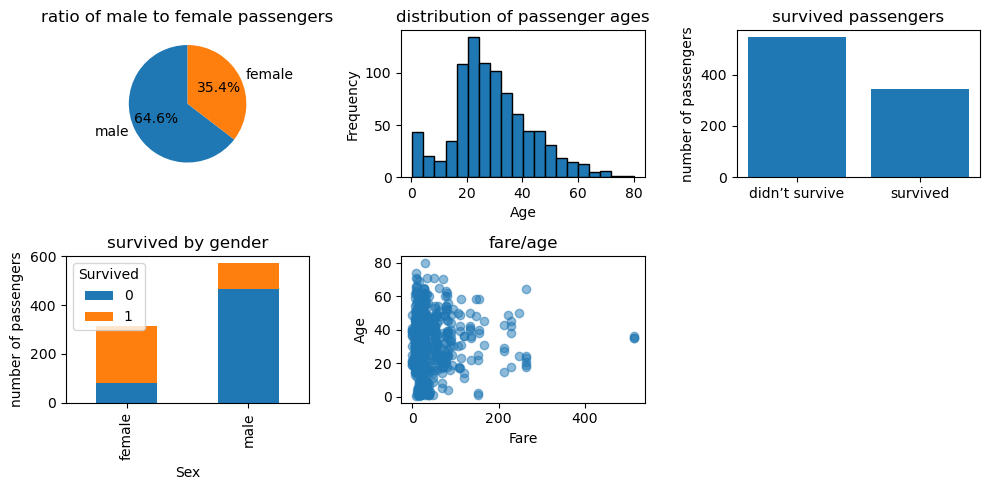

In [41]:
url = 'https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv'
df = pd.read_csv(url)

# Explore
print("head")
print(df.head())

print("\ndescribe")
print(df.describe())

print("\ninfo")
print(df.info())


# Visualize
plt.figure(figsize=(10, 5))
# pie chart
gender_counts = df['Sex'].value_counts()
plt.subplot(231)
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('ratio of male to female passengers')

# histogram
plt.subplot(232)
plt.hist(df['Age'].dropna(), bins=20, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('distribution of passenger ages')


# bar plot
survival_counts = df['Survived'].value_counts()
plt.subplot(233)
plt.bar(survival_counts.index, survival_counts.values)
plt.xticks(survival_counts.index, ['didn’t survive', 'survived'])
plt.ylabel('number of passengers')
plt.title('survived passengers')

# stacked bar plot
gender_survival_counts = df.groupby(['Sex', 'Survived']).size().unstack()
gender_survival_counts.plot(kind='bar', stacked=True, ax=plt.subplot(234))
plt.ylabel('number of passengers')
plt.title('survived by gender')

# scatter plot
plt.subplot(235)
plt.scatter(df['Fare'], df['Age'], alpha=0.5)
plt.xlabel('Fare')
plt.ylabel('Age')
plt.title('fare/age')

plt.subplots_adjust(wspace=1, hspace=1)

plt.tight_layout()
plt.show()

4. Preprocess the Data: Clean and preprocess the data:
Handle missing values in the ‘Age’ column by replacing them with the mean or median age.
Normalize the ‘Fare’ column using a suitable method.
Convert the ‘Sex’ column into numerical representation using one-hot encoding.

In [26]:
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Fare'] = np.log1p(df['Fare'])
df = pd.get_dummies(df, columns=['Sex'], drop_first=True)
print(df.head())

   Survived  Pclass                                               Name   Age  \
0         0       3                             Mr. Owen Harris Braund  22.0   
1         1       1  Mrs. John Bradley (Florence Briggs Thayer) Cum...  38.0   
2         1       3                              Miss. Laina Heikkinen  26.0   
3         1       1        Mrs. Jacques Heath (Lily May Peel) Futrelle  35.0   
4         0       3                            Mr. William Henry Allen  35.0   

   Siblings/Spouses Aboard  Parents/Children Aboard      Fare  Sex_male  
0                        1                        0  2.110213         1  
1                        1                        0  4.280593         0  
2                        0                        0  2.188856         0  
3                        1                        0  3.990834         0  
4                        0                        0  2.202765         1  


5. Data Analysis: Use pandas and numpy to analyze the data. Here are some specific tasks:
Calculate the survival rate for different genders.
Calculate the survival rate for different passenger classes.
Identify the passenger with the highest fare.

In [27]:

rate_gender = df.groupby('Sex_male')['Survived'].mean()
print("\nsurvival rate by gender")
print(rate_gender)

rate_class = df.groupby('Pclass')['Survived'].mean()
print("\nsurvival rate by class")
print(rate_class)

hf_passenger = df[df['Fare'] == df['Fare'].max()]
print("\npassenger with the highest fare")
print(hf_passenger[['Name', 'Fare']])


survival rate by gender
Sex_male
0    0.742038
1    0.190227
Name: Survived, dtype: float64

survival rate by class
Pclass
1    0.629630
2    0.472826
3    0.244353
Name: Survived, dtype: float64

passenger with the highest fare
                                  Name      Fare
257                    Miss. Anna Ward  6.240917
676  Mr. Thomas Drake Martinez Cardeza  6.240917
733              Mr. Gustave J Lesurer  6.240917
